In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
from collections import defaultdict

/Users/hackinteachk./.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = defaultdict(list)
with open("mem_result.txt", "r") as f:
    while f.readable():
        f.readline()
        n = f.readline()
        num = re.match(r"^\[([0-9]{1,2})\]$" ,n).group(1)
        for i in range(4):
            value = np.float(f.readline().strip("\n"))
            data[num].append(value)
        if num == "60":
            break

In [3]:
x = list(map(int, data.keys()))
y = np.array(list(data.values()))

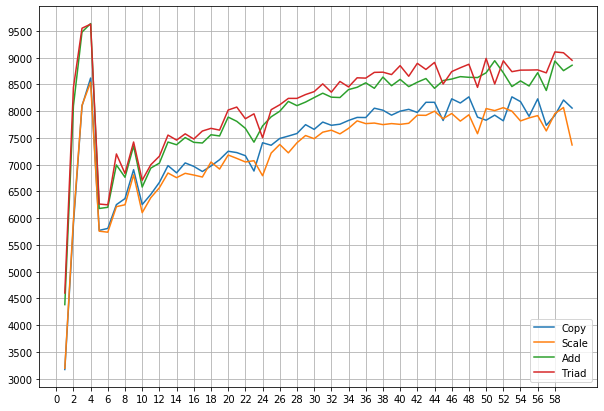

In [4]:
labels=["Copy", "Scale", "Add", "Triad"]
plt.figure(figsize=(10,7))
for i, l in enumerate(labels):
    plt.plot(x,y[:,i], label=l)
plt.legend()
plt.xticks(ticks=np.arange(0, len(data), 2));
plt.yticks(ticks=np.arange(3000, 10_000, 500));
plt.grid()

In [5]:
from json import load
import os

In [22]:
result_path = "../result"
alg_files = os.listdir(result_path)
alg_res_regex = r"^(.*)-T([\d]{1,2})-R([\d]{1,3}).json$"
alg_data = {}
print(alg_files)

data = dict()
for alg in alg_files:
    di = load(open(os.path.join(result_path, alg), 'r'))
    grps = re.match(alg_res_regex, alg)
    alg_name = grps.group(1)
    thread = grps.group(2)
    rounds = grps.group(3)
    alg_d = dict()
    print(alg_name)

    for k, v in di.items():
        fn, nthr, func = list(map(str.strip, k.split(",")))
        size = int(re.match(r"^data/map/size-(\d{1,}).csv$", fn).group(1))
        if size not in alg_d:
            alg_d[size] = dict()
#             if size not in alg_d[func]:
#                 alg_d[func][size] = dict()
        alg_d[size][func] = v["nanos"] + (v["secs"]*1e9)
    data[alg_name] = alg_d
data

['scan-T24-R10.json', 'map-T24-R10.json', 'qs-T24-R10.json', 'sample_sort_par-T24-R10.json']
scan
map
qs
sample_sort_par


{'scan': {1048576: {'par_scan': 8354952.0, 'rayon_sum': 114607.0},
  134217728: {'par_scan': 1008080384.0, 'rayon_sum': 33030688.0},
  16777216: {'par_scan': 129599768.0, 'rayon_sum': 4861523.0},
  2097152: {'par_scan': 15535196.0, 'rayon_sum': 151428.0},
  33554432: {'par_scan': 255006432.0, 'rayon_sum': 8976994.0},
  67108864: {'par_scan': 507724416.0, 'rayon_sum': 16435888.0},
  8388608: {'par_scan': 66232784.0, 'rayon_sum': 916063.0}},
 'map': {1048576: {'half_split_Multiply': 1262515.0,
   'rayon_par_iter_Multiply': 2256338.0,
   'sqrt_n_Multiply': 2552829.0},
  134217728: {'half_split_Multiply': 431057216.0,
   'rayon_par_iter_Multiply': 411413920.0,
   'sqrt_n_Multiply': 457655264.0},
  16777216: {'half_split_Multiply': 56911936.0,
   'rayon_par_iter_Multiply': 56332576.0,
   'sqrt_n_Multiply': 66037840.0},
  2097152: {'half_split_Multiply': 6806306.0,
   'rayon_par_iter_Multiply': 7303578.0,
   'sqrt_n_Multiply': 11512941.0},
  33554432: {'half_split_Multiply': 109295112.0,
   

par_scan
rayon_sum


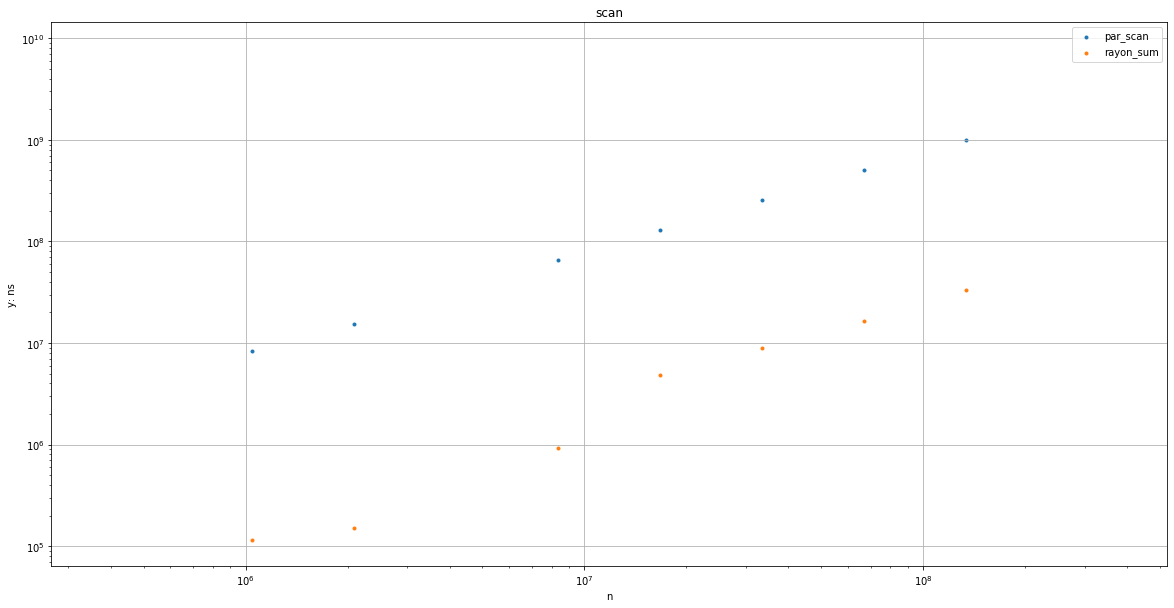

half_split_Multiply
rayon_par_iter_Multiply
sqrt_n_Multiply


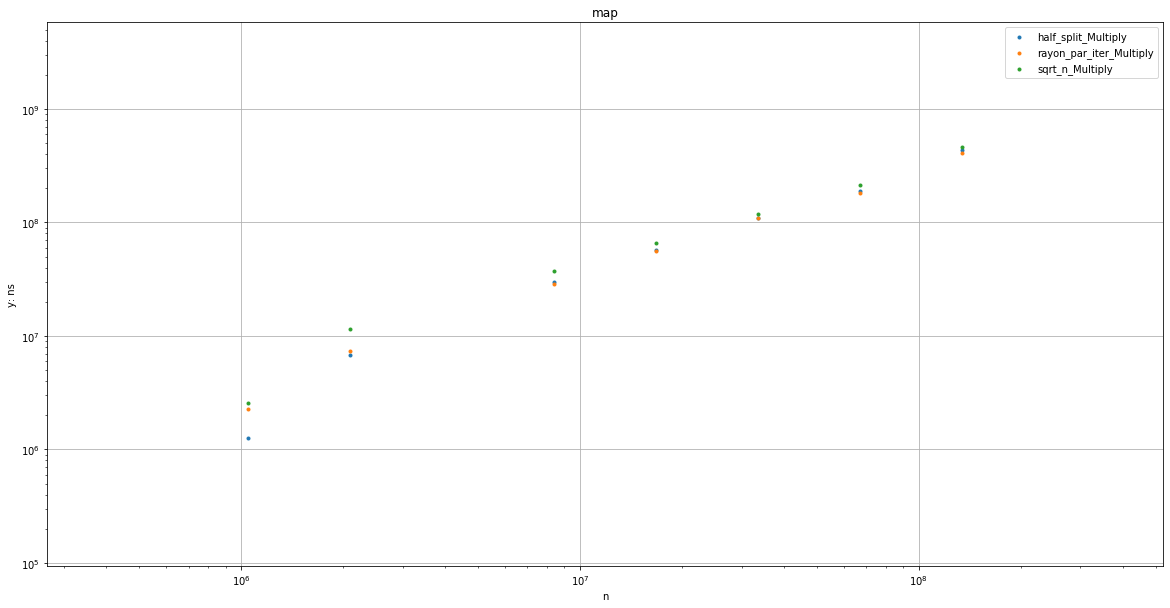

par_quick_sort (in-place)
par_quick_sort (non-in-place)
par_quick_sort (rayon)


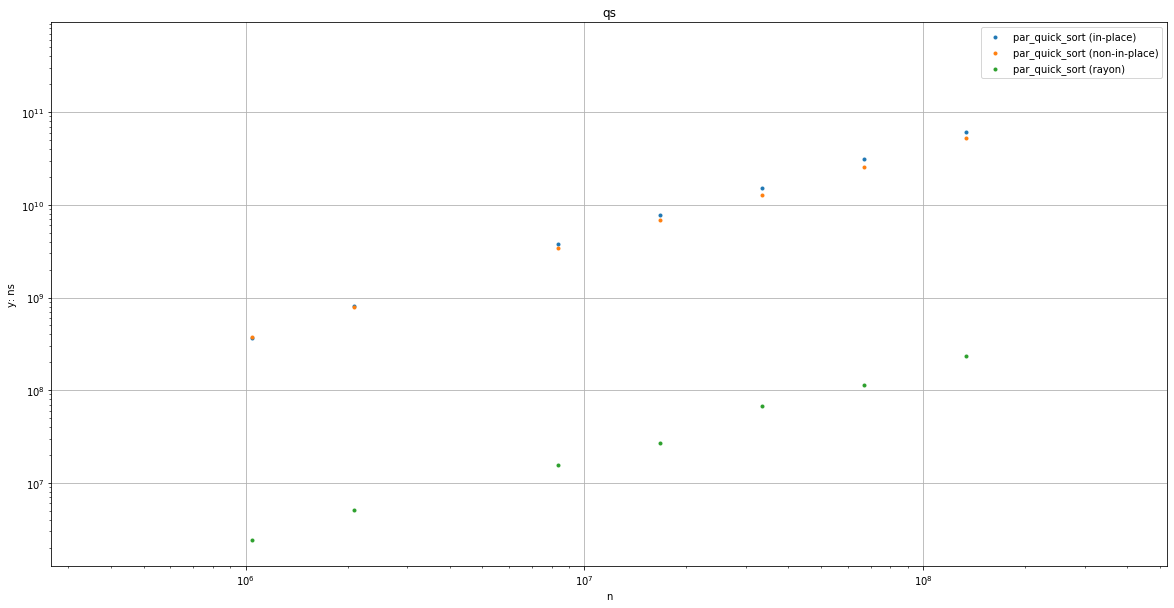

sample_sort par


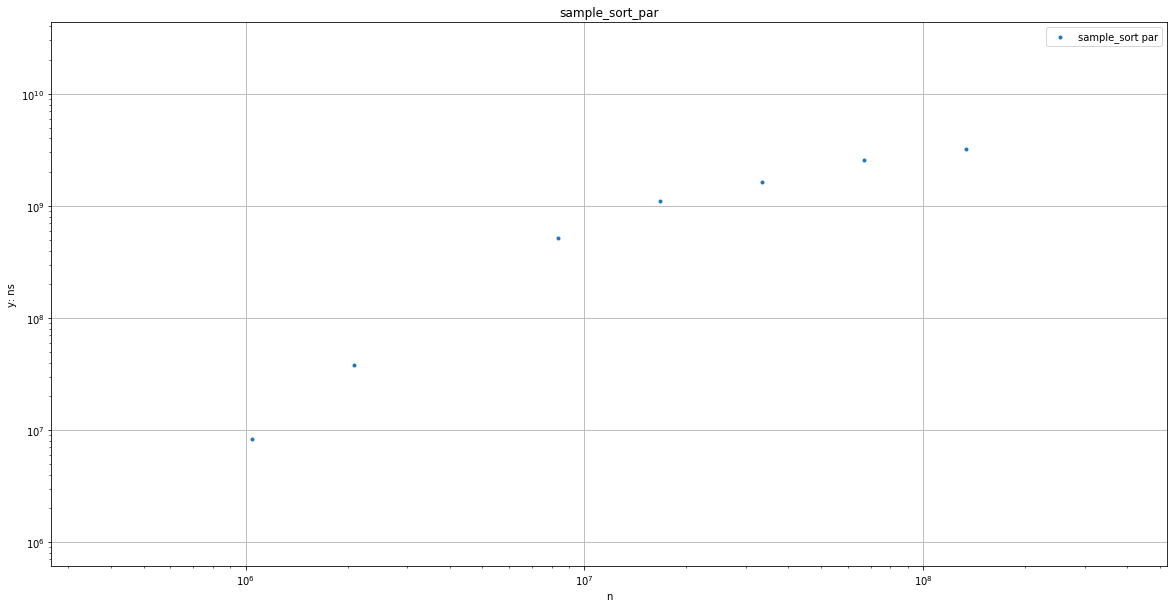

In [27]:
result = dict()
for alg, d in data.items():
    result[alg] = dict()
    for size, map_ver in d.items():
        for ver, tm in map_ver.items():
            if ver not in result[alg]:
                result[alg][ver] = {"x":[], "y": []}
            result[alg][ver]["x"].append(size)
            result[alg][ver]["y"].append(tm)

for alg, vers in result.items():
    plt.figure(figsize=(20,10))
    plt.title(alg)
    plt.xlabel("n")
    plt.ylabel("y: ns")
    plt.xscale("log")
    plt.yscale("log")
    for v, pts in vers.items():
        print(v)
        plt.scatter(pts['x'], pts['y'], label=v, marker='.')
    plt.legend()
    plt.grid()
    plt.show()

In [24]:
result = dict()
for alg, d in alg_data.items():
    result[alg] = dict()
    for size, map_ver in d.items():
        for ver, tm in map_ver.items():
            if ver not in result[alg]:
                result[alg][ver] = {"x":[], "y": []}
            result[alg][ver]["x"].append(size)
            result[alg][ver]["y"].append(tm)
for alg, vers in result.items():
    plt.figure(figsize=(20,10))
    plt.title(alg)
    plt.xlabel("n")
    plt.ylabel("y: ns")
    plt.xscale("log")
    plt.yscale("log")
    for v, pts in vers.items():
        print(v)
        plt.scatter(pts['x'], pts['y'], label=v, marker='o')
    plt.legend()